# Stack Overflow: Coding Language Data

In [6]:
# Imports
import pandas as pd
df = pd.read_csv("QueryResults.csv", names = ["DATE", "TAG", "POSTS"], header = 0)


#### Initial checks

In [7]:
df.shape
df.columns      # Need to fix the name of the columns-- Fixed by changing the first set of codes.
df.dtypes      # Need to fix the date-time
df.head()

,DATE,TAG,POSTS
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,javascript,162
3,2008-08-01 00:00:00,c,85
4,2008-08-01 00:00:00,python,124


In [8]:
## Changing the type for the date
df.DATE = pd.to_datetime(df.DATE)

### Challenge
Question 1:
The TAG is the name of the programming language. So for example in July 2008, there were 3 posts tagged with the language C#. Given that the TAG serves as our category column, can you figure out how to count the number of posts per language? Which programming language had the most number of posts since the creation of Stack Overflow? (Hint: you may need to review one of yesterday's lessons).

Question 2:
Also, some languages are older like C and other languages are newer (like Swift). The dataset starts in July 2008, so some languages will not have any posts for every month. Can you count how many months of posts exist for each programming language?

In [10]:
# ### Question 1:
# post_per_tag = df.groupby("TAG").sum()["POSTS"]
# post_per_tag.sort_values(ascending= False)

### Question 2:
post_per_tag = df.groupby("TAG").count()["POSTS"]
post_per_tag.sort_values(ascending= False)


TAG
c#            145
assembly      144
c             144
c++           144
delphi        144
java          144
python        144
javascript    144
perl          144
php           144
ruby          144
r             142
swift         135
go            129
Name: POSTS, dtype: int64

### The pivot function

In [11]:
## Pivot function parameters( index= rows , columns, what goes in the column, values = numbers you want to represent)
reshaped_df = df.pivot(index = "DATE", columns ="TAG", values ="POSTS")

        # First set of values for the dataframe
reshaped_df.head()
        # Shape of the dataframe
reshaped_df.shape
reshaped_df.columns
reshaped_df.count()             # Tells you the number of non-zero values for each of the columns.
reshaped_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,85.0,511.0,164.0,14.0,NaN,222.0,162.0,28.0,161.0,124.0,NaN,73.0,NaN
2008-09-01,28.0,321.0,1649.0,755.0,105.0,NaN,1137.0,640.0,131.0,482.0,542.0,6.0,290.0,NaN
2008-10-01,15.0,303.0,1989.0,811.0,112.0,NaN,1153.0,725.0,127.0,617.0,510.0,NaN,249.0,NaN
2008-11-01,17.0,259.0,1730.0,735.0,141.0,NaN,958.0,579.0,97.0,504.0,452.0,1.0,160.0,NaN


### The fillna function:

In [12]:
reshaped_df.fillna(0, inplace = True)
reshaped_df.isna().values.any()

np.False_

## Data Visualisation with Matplotlib

In [13]:
### Import statement

import matplotlib.pyplot as plt


#### Plotting Javascript Posts( One variable)

Text(0.5, 1.0, 'Javascript tags across the years')

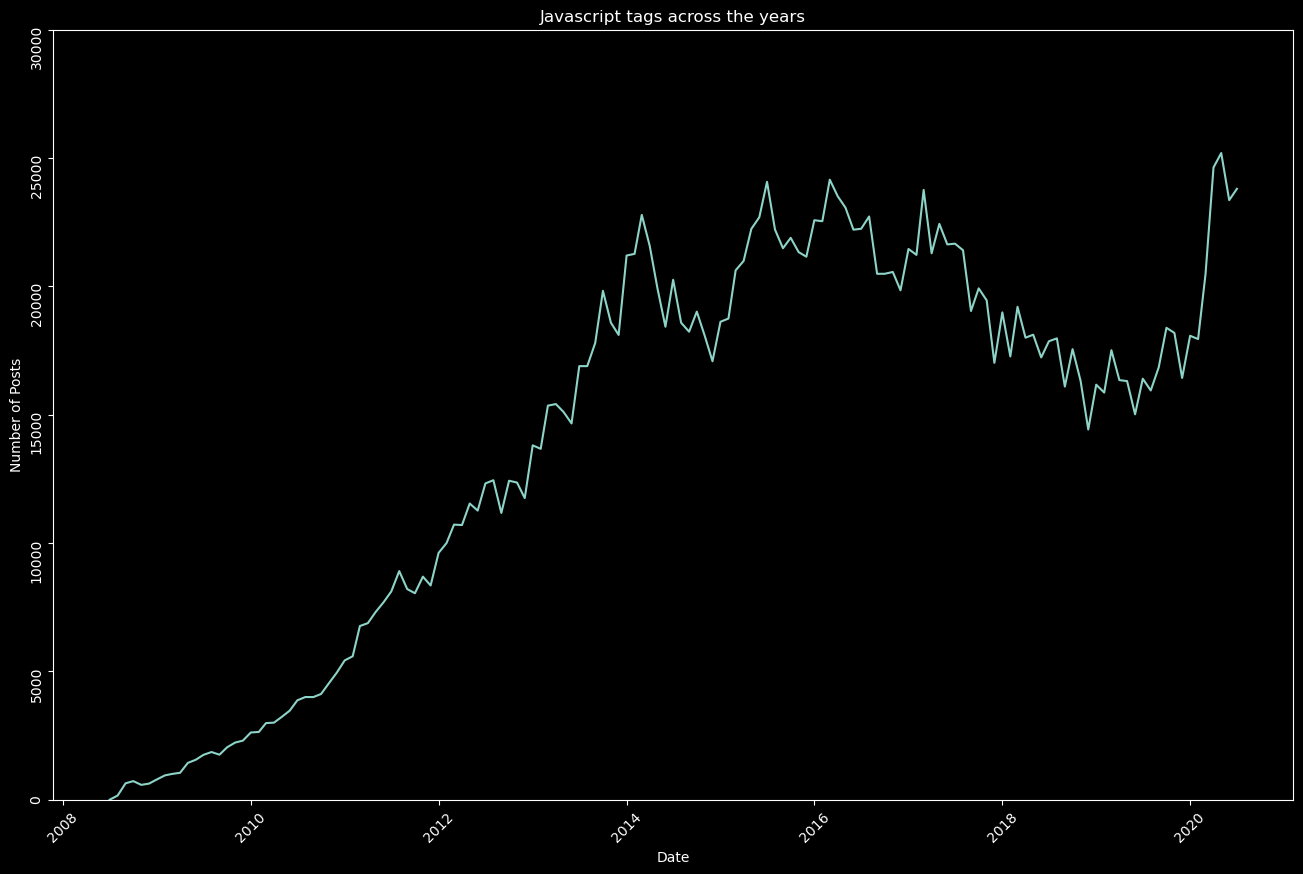

In [14]:
## Arguments ( x label, y label, data)         ## If it a reshaped onw through the use of pivot-- use index signe that its nested

        # Sizing Arguments
plt.figure(figsize = (16,10))
plt.xticks(rotation = 45, fontsize = 10)
plt.yticks(fontsize = 10, rotation = 90)

        # Plotting the graph
plt.plot(reshaped_df.index, reshaped_df["javascript"])


        # Other features
plt.xlabel("Date", rotation = 0, fontsize = 10)
plt.ylabel("Number of Posts", fontsize = 10, rotation = 90)
plt.ylim(0, 30000)
plt.title("Javascript tags across the years")

#### Plotting two variables next to each other on the same axis

In [ ]:
        # Sizing Arguments
plt.figure(figsize = (16,10))
plt.xticks(rotation = 45, fontsize = 10)
plt.yticks(fontsize = 10, rotation = 90)

        # Plotting the graph
plt.plot(reshaped_df.index, reshaped_df[["javascript","python"]])       ## Or jsut write another


        # Other features
plt.xlabel("Date", rotation = 0, fontsize = 10)
plt.ylabel("Number of Posts", fontsize = 10, rotation = 90)
plt.ylim(0, 50000)

#### Adding multiple lines( More than two of them)

In [ ]:
## Sizing of the graph
plt.figure(figsize = (16,10))
plt.xticks(rotation = 45, fontsize = 10)
plt.yticks(fontsize = 10, rotation = 90)

# Graph lines
for column in reshaped_df:
    plt.plot(reshaped_df.index,
             reshaped_df[column],
             linewidth=3,                                   ## For the legend
             label=reshaped_df[column].name)

# Other features
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
plt.legend(fontsize=14)

#### Smoothing out the data

In [ ]:
## Average out 6 values out a time
rolling_df = reshaped_df.rolling(window= 6).mean()


## Sizing of the graph
plt.figure(figsize = (16,10))
plt.xticks( rotation = 45, fontsize = 10)
plt.yticks(fontsize =10, rotation = 45)


## Drawing out the graph
for column in rolling_df:
    plt.plot(rolling_df.index,
             rolling_df[column],
             linewidth =3,
             label = rolling_df[column].name)

## Adding extra features
plt.xlabel("Date", fontsize=14)
plt.ylabel("Number of Posts", fontsize=14)
plt.ylim(0, 50000)
plt.legend(fontsize= 14)
